# Funcion de Rastrigin

La función rastrigin es una función no convexa que regularmente es empleada como test de desempeño en diversos algoritmos de optimización (mono-objetivo). Dado la gran cantidad de mínimos locales (función multimodal), algunos algoritmos de optimización pueden estancarse en el proceso de búsqueda y no convergen al mínimo global.

La función de Rastrigin se define como:

$$F(x)=An + \sum_{i=1}^{n}x_{i}^2 -Acos(2x_{i}\pi), \ con \ A=10, \ x_{i} \in [-5.12,5.12]$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Descenso por gradiente 

### 2D

$$F(x,y) = 20 + x^2 - 10\cos(2x\pi)+ y^2 - 10\cos(2y\pi)$$

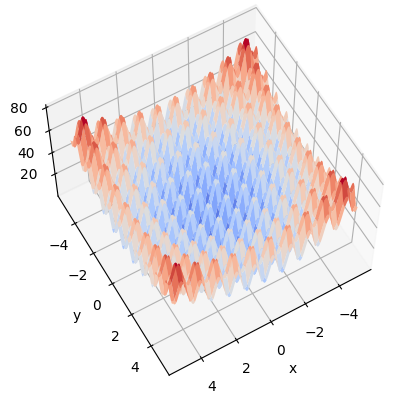

In [145]:
# Función de Rastring en dos dimensiones
def rastring_2D(x, y):
    fx=20 + x**2 - 10*np.cos(2*x*np.pi) + y**2 - 10*np.cos(2*y*np.pi)
    return fx

# Graficar la función de Rastring en 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d', azim=60, elev=60)
#creamos un vector  X de cordenadas desde -5.12 hasta 5.12 con saltos de 0.05
X = np.arange(-5.12, 5.12, 0.05)
#creamos un vector  Y de cordenadas desde -5.12 hasta 5.12 con saltos de 0.05
Y = np.arange(-5.12, 5.12, 0.05)
#lista de matrices de coordenadas a partir de vectores de coordenadas.
X, Y = np.meshgrid(X, Y)
Z = rastring_2D(X, Y)
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [146]:
# Gradiente de la función de Rastring
def rastring_gradient_2D(x, y):
    """
    The function rastring_gradient takes two inputs, x and y, and returns the gradient of the Rastring
    function with respect to x and y
    
    :param x: The x-coordinate of the starting point
    :param y: The initial value of the function
    :return: The gradient of the function
    """
    #derivada de la funcion Rastring respecto a X
    dx = 2*x+10*np.sin(2*x*np.pi)*(2*np.pi)
    #derivada de la funcion Rastring respecto a Y
    dy = 2*y+10*np.sin(2*y*np.pi)*(2*np.pi)
    return np.array([dx, dy])

In [147]:
# Método de descenso por gradiente para optimizar la función de rastring en 2D
def gradient_descent_rastring_2D(x0, y0, alpha, epsilon, max_iter):
    """
    It takes in the initial guess, the learning rate, the tolerance, and the maximum number of
    iterations, and returns the final guess and the number of iterations it took to converge
    
    :param x0: Initial x value
    :param y0: initial y value
    :param alpha: learning rate
    :param epsilon: the tolerance for the norm of the gradient. If the norm of the gradient is less than
    epsilon, we stop
    :param max_iter: maximum number of iterations
    :return: the point x and the number of iterations i.
    """
    x = np.array([x0, y0])
    i = 0
    while i < max_iter:
        grad = rastring_gradient_2D(x[0], x[1])
        if np.linalg.norm(grad) < epsilon:
            break
        x -= alpha * grad
        i += 1
    return x, i

In [148]:
# Prueba de la función de optimización en 2D
x0, y0 = np.random.uniform(-5.12, 5.12), np.random.uniform(-5.12, 5.12)
alpha = 0.001
epsilon = 0.00001
max_iter = 10000
x_min, num_iter = gradient_descent_rastring_2D(x0, y0, alpha, epsilon, max_iter)
print(f"Mínimo global encontrado: ({x_min[0]:.4f}, {x_min[1]:.4f})")
print(f"Número de iteraciones: {num_iter}")

Mínimo global encontrado: (-0.9950, 3.9798)
Número de iteraciones: 35


### 3D

$$F(x,y,z) = 30 + x^2 - 10\cos(2x\pi)+ y^2 - 10\cos(2y\pi)+ z^2 - 10\cos(2z\pi)$$

In [93]:
# Función de Rastring en dos dimensiones
def rastring_3D(x, y, z):
    fx=30 + x**2 - 10*np.cos(2*x*np.pi) + y**2 - 10*np.cos(2*y*np.pi)+ z**2 - 10*np.cos(2*z*np.pi)
    return fx

In [142]:
# Gradiente de la función de Rastrigin
def rastrigin_gradient_3D(x, y,z):
    #derivada de la funcion Rastring respecto a X
    dx = 2*x+10*np.sin(2*x*np.pi)*(2*np.pi)
    #derivada de la funcion Rastring respecto a Y
    dy = 2*y+10*np.sin(2*y*np.pi)*(2*np.pi)
    #derivada de la funcion Rastring respecto a Z
    dz = 2*z+10*np.sin(2*z*np.pi)*(2*np.pi)
    return np.array([dx, dy, dz])

# Método de descenso por gradiente para optimizar la función de Rastrigin en 2D
def gradient_descent_rastrigin_3D(x0, y0,z0, alpha, epsilon, max_iter):
    x = np.array([x0, y0,z0])
    i = 0
    while i < max_iter:
        grad = rastrigin_gradient_3D(x[0], x[1],x[2])
        if np.linalg.norm(grad) < epsilon:
            break
        x -= alpha * grad
        i += 1
    return x, i

In [143]:

# Prueba de la función de optimización en 2D
x0, y0,z0 = np.random.uniform(-5.12, 5.12), np.random.uniform(-5.12, 5.12),np.random.uniform(-5.12, 5.12)
alpha = 0.001
epsilon = 0.0001
max_iter = 10000
x_min, num_iter = gradient_descent_rastrigin_3D(x0, y0,z0, alpha, epsilon, max_iter)
print(f"Mínimo global encontrado: ({x_min[0]:.4f}, {x_min[1]:.4f})")
print(f"Número de iteraciones: {num_iter}")

Mínimo global encontrado: (3.9798, -2.9849)
Número de iteraciones: 33
